In [1]:
%matplotlib inline
from matplotlib import image
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
## set Parameters
sigma = 8e-2 ;  #noise level
tol = 1e-6 ; # |u_(k+1)-u_k| < tol
TVtype = 2 ; # 1 : anisotropic TV, 2 : isotropic TV 

## SB parameter
lambda_sb = 10 ;
maxiter_sb = 100 ;
gamma_sb = 5

In [3]:
image1 = image.imread("lena.jpg")

In [4]:
image1=image1/255

In [5]:
def add_noise(im):
    size = im.shape
    gauss = np.random.normal(0,sigma,size)
    print(gauss)
    im = im+gauss
    return im

In [6]:
image2= add_noise(image1)

[[-0.08440525  0.03320806  0.10390718 ... -0.06573069  0.10704271
  -0.05032029]
 [-0.05833315 -0.06862111 -0.07052967 ... -0.03420447 -0.02766919
   0.03946105]
 [ 0.06580599 -0.1178247  -0.03991934 ... -0.05785025  0.07891189
  -0.03572605]
 ...
 [ 0.13702249  0.06276252  0.06266009 ...  0.05260449 -0.00850859
   0.11709693]
 [-0.02721674  0.02969497  0.0115019  ... -0.06269926  0.08251549
   0.06039534]
 [-0.00866977  0.03678135 -0.04953686 ...  0.05066393 -0.05354376
   0.02249611]]


In [7]:
def tv_sb(im ,lam_sb=10 ,tol = 1e-6 , maxiter=100 , gamma_sb=5):
    a,b = im.shape ##圖片大小
    imu = np.array([0]+[i for i in range(a-1)])
    imd = np.array([i+1 for i in range(a-1)]+[a-1])
    iml = np.array([0]+[i for i in range(b-1)])
    imr = np.array([i+1 for i in range(b-1)]+[b-1])
    
    ##initial condition
    u = im

    bx = np.zeros([a,b])
    by = np.zeros([a,b])
    dx = np.zeros([a,b])
    dy = np.zeros([a,b])
    
    it = 0;  #interative times
    error = 100;  #relative error

    while it < maxiter and error >= tol :
        ##u-subproblem
        alpha = lam_sb / gamma_sb;
        d_bx = dx-bx;
        d_by = dy-by;
        u_new = (alpha*im - d_bx + d_bx[:,iml] - d_by + d_by[imu,:] + u[imu,:] + u[imd,:] + u[:,iml] + u[:,imr] + 4*u )/(alpha + 8);
        
        ##d-subproblem
       
        ux = np.concatenate((np.diff(u,1,1), np.zeros([a,1])),axis=1);
        uy = np.concatenate((np.diff(u,1,0),np.zeros([1,b])));
        wx = ux + bx;
        wy = uy + by;
        x = abs(wx)-1/gamma_sb
        x[x<0]=0
        dx = np.sign(wx)* x;
        y = abs(wy)-1/gamma_sb
        y[y<0]=0
        dy = np.sign(wy)* y;
        bx = bx + ux - dx;
        by = by + uy - dy;
        #relative error
        error =np.sum((u_new-u)*(u_new-u))/np.sum(u*u)
        it = it + 1;
        u = u_new;
    print("Iteration complete!!")
    print("Iteration time :",it)
    return u,it

In [8]:
ts = time.time()
new_image,it = tv_sb(image2)
te = time.time()
print("time",round(te-ts,2))

Iteration complete!!
Iteration time : 36
time 2.87


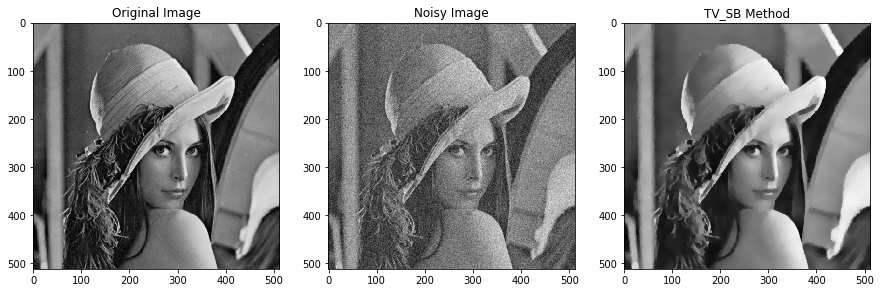

In [12]:
fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax1.imshow(image1,cmap="gray")
ax1.title.set_text("Original Image")
ax2.imshow(image2,cmap="gray")
ax2.title.set_text("Noisy Image")
ax3.imshow(new_image,cmap="gray")
ax3.title.set_text("TV_SB Method")